In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spending-habits/spending_patterns_detailed.csv


### Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Hyphothesis that we will try to prove
1. People spend more money with subscriptions than personal Hygiene
2. More money is spent on food compared to personal groceries.
3. People tend to take more care of their overall fitness than their own medical or dental health
4. Credict cards are the most used payment methods
5. People don't spend a lot of money in medical\dental health compared to other types of expenses
6. People don't go so often to physical stores 

## Reading the data

In [3]:
df = pd.read_csv("/kaggle/input/spending-habits/spending_patterns_detailed.csv")

In [4]:
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [5]:
df.tail()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,CUST_0072,Housing and Utilities,Water Bill,1,69.46,69.46,Debit Card,Online,2023-09-01
9996,CUST_0150,Groceries,Snacks,5,15.54,77.70,Debit Card,In-store,2024-06-27
9997,CUST_0122,Shopping,Electronics,1,732.03,732.03,Debit Card,In-store,2024-03-19
9998,CUST_0133,Transportation,Car Repair,1,107.63,107.63,Debit Card,Mobile App,2024-10-17
9999,CUST_0058,Housing and Utilities,Gas Bill,1,98.79,98.79,Credit Card,Mobile App,2024-08-04


In [6]:
df.dtypes

Customer ID          object
Category             object
Item                 object
Quantity              int64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

In [7]:
df.columns

Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [8]:
df["Category"].unique()

array(['Groceries', 'Friend Activities', 'Housing and Utilities',
       'Fitness', 'Gifts', 'Transportation', 'Travel', 'Personal Hygiene',
       'Hobbies', 'Shopping', 'Medical/Dental', 'Food', 'Subscriptions'],
      dtype=object)

In [9]:
df["Item"].unique()

array(['Milk', 'Dinner with Friends', 'Water Bill', 'Yoga Class',
       'Flowers', 'Car Repair', 'Personal Trainer', 'Plane Ticket',
       'Kids Games', 'Bread', 'Toothpaste', 'Crochet Supplies',
       'Gas Bill', 'Jewelry', 'Car', 'Shoes', 'Dentist Visit', 'Chicken',
       'Clothes', 'Snacks', 'Fast Food', 'Restaurant Meal', 'Taxi/Uber',
       'Doctor Visit', 'Public Transit', 'Medicine', 'Vegetables', 'Gas',
       'Streaming Service', 'Shampoo', 'Electricity Bill',
       'Skin Care Products', 'Coffee', 'Art Supplies', 'Magazine',
       'Movie Tickets', 'Workout Equipment', 'Meat', 'Rent',
       'Concert Tickets', 'Gift Cards', 'Hotel Stay', 'Soap', 'Books',
       'Electronics', 'Fruits', 'Gym Membership', 'Video Games'],
      dtype=object)

In [10]:
df.nunique()

Customer ID          200
Category              13
Item                  48
Quantity               5
Price Per Unit      7473
Total Spent         8382
Payment Method         4
Location               3
Transaction Date     744
dtype: int64

## Data Cleaning and Preparation
What we are gonna do:

 1. Which columns are relevant or irrelevant to us?
    
 2. Do we have duplicates inside our dataset?

 3. Handle Missing or null values
    
 4. Creating Features

I will retain the following columns: Category, Quantity, Total Spent, Payment Method, and Location.

The following columns will not be used: Customer ID, Item, Price Per Unit, and Transaction Date, for the reasons below:

- Customer ID: The specific identification of each customer is not necessary.
- Item: The Category column already provides sufficient information about the type of item.
- Price Per Unit: We are not interested in the individual unit prices.
- Transaction Date: This information is not relevant to our analysis.

In [11]:
df = df[['Customer ID' ,'Category',  'Quantity','Total Spent', 'Payment Method', 'Location']].copy()

In [12]:
df.head()

,Customer ID,Category,Quantity,Total Spent,Payment Method,Location
0,CUST_0159,Groceries,1,1.28,Debit Card,Mobile App
1,CUST_0017,Friend Activities,2,149.39,Debit Card,In-store
2,CUST_0094,Housing and Utilities,1,76.06,Digital Wallet,Mobile App
3,CUST_0162,Fitness,5,56.18,Cash,In-store
4,CUST_0129,Gifts,3,131.12,Debit Card,In-store


Much more cleaner, now we can work properly

Duplicated Values

In [13]:
duplicateRows = df[df.duplicated()]
print(duplicateRows.sum())

Customer ID         0
Category            0
Quantity            0
Total Spent       0.0
Payment Method      0
Location            0
dtype: object


Lets see the null values

In [14]:
df.isnull().sum()

Customer ID       0
Category          0
Quantity          0
Total Spent       0
Payment Method    0
Location          0
dtype: int64

Endoding categoriacal variables to numerical 

Which data do we need to label?

In [15]:
df.head()

,Customer ID,Category,Quantity,Total Spent,Payment Method,Location
0,CUST_0159,Groceries,1,1.28,Debit Card,Mobile App
1,CUST_0017,Friend Activities,2,149.39,Debit Card,In-store
2,CUST_0094,Housing and Utilities,1,76.06,Digital Wallet,Mobile App
3,CUST_0162,Fitness,5,56.18,Cash,In-store
4,CUST_0129,Gifts,3,131.12,Debit Card,In-store


category, payment method and location are categorical so we need to label them

In [16]:
features_label = [ 'Category', 'Payment Method', 'Location']

In [17]:
df["Payment Method"]

0           Debit Card
1           Debit Card
2       Digital Wallet
3                 Cash
4           Debit Card
             ...      
9995        Debit Card
9996        Debit Card
9997        Debit Card
9998        Debit Card
9999       Credit Card
Name: Payment Method, Length: 10000, dtype: object

In [18]:
mappings = {}
for col in features_label:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])
    label_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
    mappings[col] = label_mapping

for col, label_mapping in mappings.items():
    print(f"Mappings for column '{col}':")
    for original_value, label_value in label_mapping.items():
        print(f"'{original_value}' -> {label_value}")
    print("\n")


Mappings for column 'Category':
'Fitness' -> 0
'Food' -> 1
'Friend Activities' -> 2
'Gifts' -> 3
'Groceries' -> 4
'Hobbies' -> 5
'Housing and Utilities' -> 6
'Medical/Dental' -> 7
'Personal Hygiene' -> 8
'Shopping' -> 9
'Subscriptions' -> 10
'Transportation' -> 11
'Travel' -> 12


Mappings for column 'Payment Method':
'Cash' -> 0
'Credit Card' -> 1
'Debit Card' -> 2
'Digital Wallet' -> 3


Mappings for column 'Location':
'In-store' -> 0
'Mobile App' -> 1
'Online' -> 2




## Anlysing the data

### 1 - Do people tend to spend more money on subcriptions than their personal higyene?

As we saw previously:
    
- 7 Corresponds to Medical and dental
  
- 10 Corresponds to Subscriptions

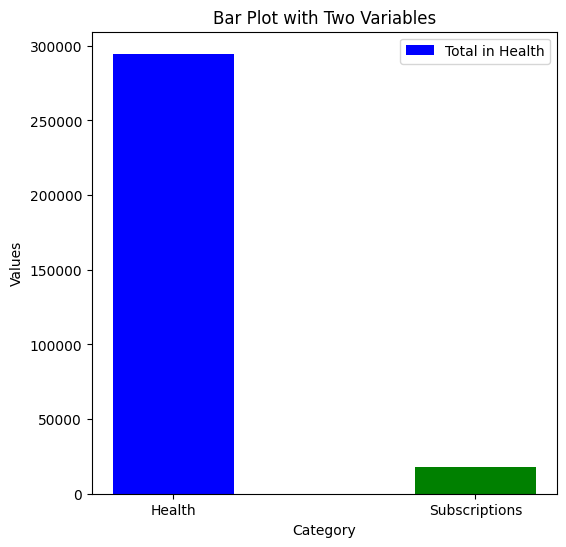

In [19]:
total_in_health = df.loc[df["Category"] == 7, "Total Spent"].sum()
total_in_subs = df.loc[df["Category"] == 10, "Total Spent"].sum()
plt.figure(figsize=(6, 6))
categories = ['Health', 'Subscriptions']
values = [total_in_health, total_in_subs]
colors = ['blue', 'green']
plt.bar(categories, values, color=colors, width=0.4, align='center')
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Plot with Two Variables')
plt.legend(['Total in Health', 'Total in Subs'])
plt.show()


So our first hypothesys was by far wrong so lets go to the next one

### 2 - Spending on food surpasses that on personal groceries, False or True?.


Food correspond to **1** and Groceries to **4** 

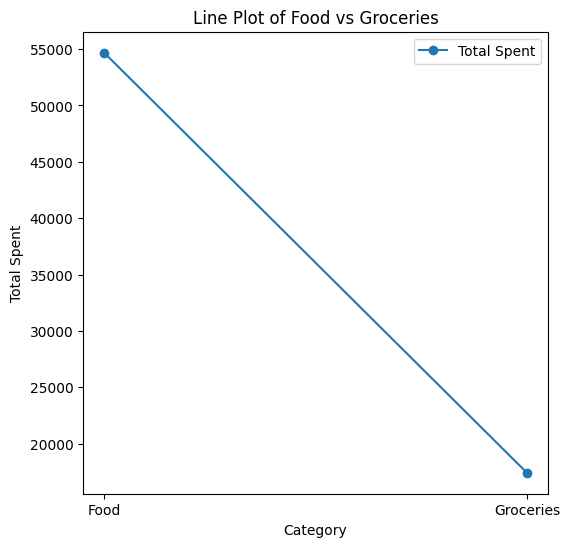

In [20]:

filtered_food = df.loc[df["Category"] == 1, "Total Spent"].sum()
filtered_groceries = df.loc[df["Category"] == 4, "Total Spent"].sum()

# Creating a DataFrame with the sums for plotting
sums_df = pd.DataFrame({
    'Category': ['Food', 'Groceries'],
    'Total Spent': [filtered_food, filtered_groceries]
})

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(sums_df['Category'], sums_df['Total Spent'], label='Total Spent', marker='o')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.title('Line Plot of Food vs Groceries')
plt.legend()

# Show the plot
plt.show()


### 3 - People often prioritize their overall fitness over their medical or dental health?

- Fitness corresponds to 0
- Medical/dental correpsonds to 7

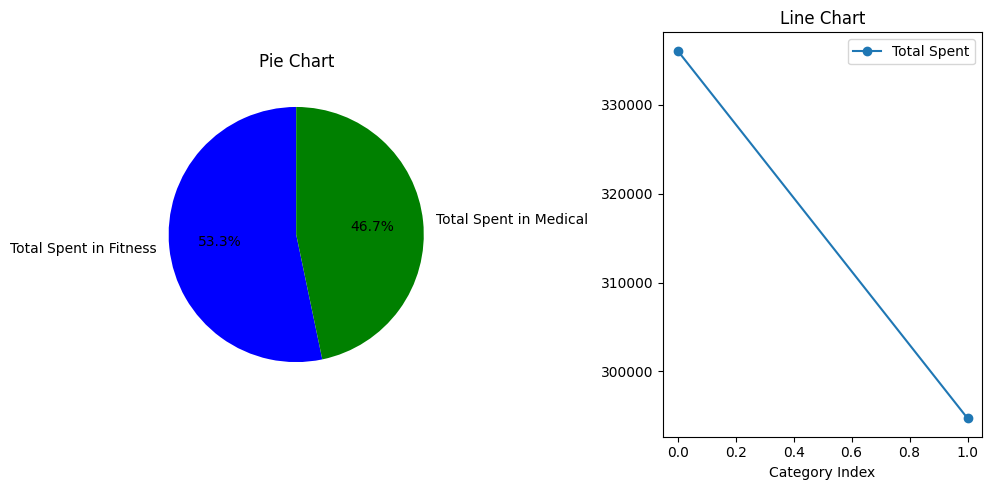

In [21]:
plt.figure(figsize=(10, 5))
labels = ["Total Spent in Fitness","Total Spent in Medical"]
values =  [
    df.loc[df["Category"] == 0, "Total Spent"].sum(), 
           df.loc[df["Category"] == 7, "Total Spent"].sum()
]

plt.subplot(121)
plt.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Pie Chart")
plt.subplot(122)

line = plt.plot(
    values, 
    label='Total Spent', marker='o'
)

plt.title("Line Chart")
plt.xlabel("Category Index")
plt.legend()
plt.tight_layout() 
plt.show()


### 4 - Credit cards are the most commonly used payment method?
- Credit Card corresponds to 2


In [22]:

catg_pay = ['Cash', 'Credit Card', 'Debit Card', 'Digital Wallet']
pay_methods = [
    len(df.loc[df["Payment Method"] == 0]),  # Cash
    len(df.loc[df["Payment Method"] == 1]),  # Credit Card
    len(df.loc[df["Payment Method"] == 2]),  # Debit Card
    len(df.loc[df["Payment Method"] == 3])   # Digital Wallet
]

sums_df_pay = pd.DataFrame({
    'Payment Method': catg_pay,
    'Sum': pay_methods
})
sums_df_pay

,Payment Method,Sum
0,Cash,2478
1,Credit Card,2499
2,Debit Card,2463
3,Digital Wallet,2560


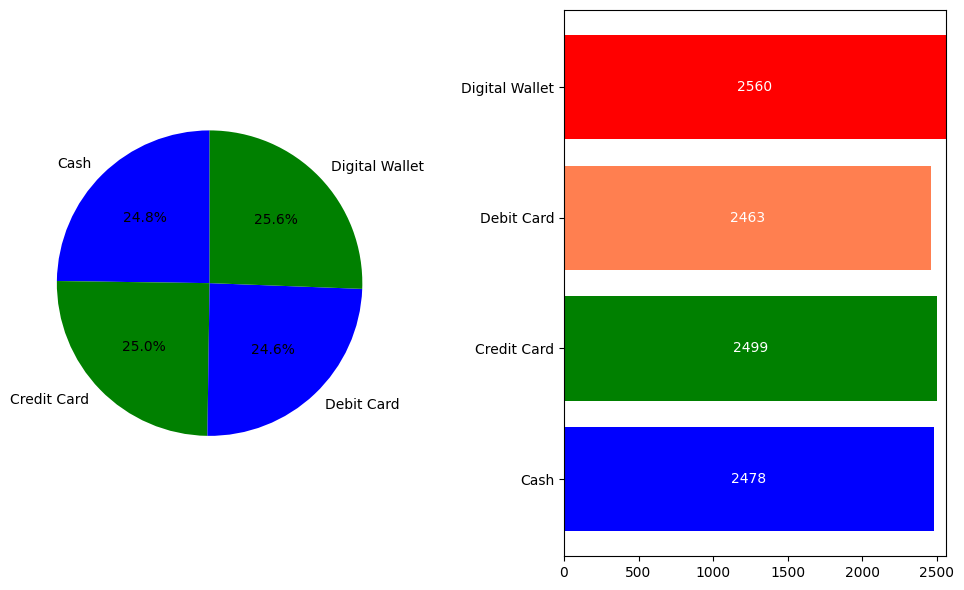

In [23]:
bar_colors = ['blue', 'green', 'coral', 'red', 'pink']
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=1, hspace=1)

plt.subplot(121)
ax1 = plt.pie(pay_methods,labels=catg_pay,autopct='%1.1f%%', startangle=90, colors=colors)

plt.subplot(122)

ax2 = plt.barh(catg_pay, pay_methods, color=bar_colors)
max_value = max(values)
plt.xlim(0, 2560) 

for bar in ax2:
    # Get the bar width and position for centering the text
    width = bar.get_width()
    # Place the text at the middle of the bar
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, 
             str(width), va='center', ha='center', fontsize=10, color='white')

plt.tight_layout()
# Show plot
plt.show()

In [24]:
df.loc[df["Category"] == 0, "Total Spent"].sum(), 
      

(336101.51,)

In [25]:
  df.loc[df["Category"] == 7, "Total Spent"].sum()

294709.1